# "First Try" Notebook
### Mainly on 15min and hourly ticker 
This first notebook is there to first dive into the different statistical analysis tools, and have a better understanding of the process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sqlalchemy

import statsmodels.api as sm
import statsmodels.tsa as smt
import statsmodels.graphics.tsaplots as smp 

In [2]:
# zertyuiop

# Importing and preping the data

In [3]:
all_crypto_15 = pd.read_csv('../data/ALL_15_interpol.csv')
all_crypto_15.head()

,open_time,close_AAVEUSDT,close_AUTOUSDT,close_BCHUSDT,close_BETHUSDT,close_BIFIUSDT,close_BNBUSDT,close_BTCUSDT,close_ETHUSDT,close_GMXUSDT,...,close_ILVUSDT,close_KP3RUSDT,close_LTCUSDT,close_MKRUSDT,close_PAXGUSDT,close_QNTUSDT,close_QUICKUSDT,close_XMRUSDT,close_YFIIUSDT,close_YFIUSDT
0,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,298.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN,4280.00,299.39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:45:00,NaN,NaN,NaN,NaN,NaN,NaN,4310.07,299.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4308.83,301.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# all_crypto_15.info()
top_history_depth = pd.DataFrame(all_crypto_15.count().sort_values(ascending=False).head(7)).reset_index()
list_column = top_history_depth["index"].iloc[1:].to_list()
list_crypto = top_history_depth["index"].str.split("_",expand=True).iloc[1:,1].to_list()
print(list_column)
print(list_crypto)

['close_ETHUSDT', 'close_BTCUSDT', 'close_BNBUSDT', 'close_LTCUSDT', 'close_XMRUSDT', 'close_BCHUSDT']
['ETHUSDT', 'BTCUSDT', 'BNBUSDT', 'LTCUSDT', 'XMRUSDT', 'BCHUSDT']


We will focus on this list of crypto currencies having the best correlation history from (02 - Corrl_analysis.ipynb)

In [5]:
list_to_keep_portfolio = ['close_AAVEUSDT', 'close_BCHUSDT', 'close_BNBUSDT',
       'close_BTCUSDT', 'close_ETHUSDT','close_LTCUSDT']

In [6]:
working_df = all_crypto_15.set_index('open_time')[list_to_keep_portfolio].dropna()
working_df.index = pd.to_datetime(working_df.index)
working_df = working_df.loc['2021']

# Statistical Analysis
### -ADF

In [7]:
adf_columns = ["adf","pvalue","usedlag","#_of_obs","critical values","icbest"]#,"1%","5%","10%"]

In [8]:
adf_df = pd.DataFrame(columns = adf_columns)
for ticker in working_df.columns :
    print(ticker)
    ans = smt.stattools.adfuller(np.array(working_df[ticker].dropna().values,dtype = 'float32'))
    
    ans_df = pd.DataFrame([ans],columns = adf_columns,index= [f"{ticker}"])
    ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= [f"{ticker}"]))
    ans_df.drop('critical values',axis=1)

    adf_df = pd.concat([adf_df,ans_df],axis = 0)

close_AAVEUSDT
close_BCHUSDT
close_BNBUSDT
close_BTCUSDT
close_ETHUSDT
close_LTCUSDT


In [9]:
adf_df

,adf,pvalue,usedlag,#_of_obs,critical values,icbest,1%,5%,10%
close_AAVEUSDT,-3.435129,0.009818,52,34987,"{'1%': -3.430536920280192, '5%': -2.8616226141...",175763.281690,-3.430537,-2.861623,-2.566814
close_BCHUSDT,-2.825392,0.054737,51,34988,"{'1%': -3.430536914937389, '5%': -2.8616226117...",214643.839654,-3.430537,-2.861623,-2.566814
close_BNBUSDT,-2.024632,0.275878,52,34987,"{'1%': -3.430536920280192, '5%': -2.8616226141...",164805.819698,-3.430537,-2.861623,-2.566814
close_BTCUSDT,-2.309526,0.168914,20,35019,"{'1%': -3.430536749461851, '5%': -2.8616225386...",475890.484070,-3.430537,-2.861623,-2.566814
close_ETHUSDT,-1.958111,0.305236,50,34989,"{'1%': -3.4305369095948914, '5%': -2.861622609...",291570.789011,-3.430537,-2.861623,-2.566814
close_LTCUSDT,-2.791463,0.059504,51,34988,"{'1%': -3.430536914937389, '5%': -2.8616226117...",127213.988571,-3.430537,-2.861623,-2.566814


In [10]:
# adf_df = pd.DataFrame(columns = adf_columns)
# working_df_diff = working_df.diff()
# for ticker in working_df.columns :
#     print(ticker)
#     ans = smt.stattools.adfuller(np.array(working_df_diff[ticker].dropna().values,dtype = 'float32'))
    
#     ans_df = pd.DataFrame([ans],columns = adf_columns,index= [f"{ticker}"])
#     ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= [f"{ticker}"]))
#     # ans_df.drop('critical values',axis=1)

#     adf_df_diff = pd.concat([adf_df_diff,ans_df],axis = 0)

# adf_df_diff.drop('critical values',axis=1,inplace = True)
# adf_df_diff

# OLS Regression

In our case we decide to model the BTC from other crypto currencies

In [11]:
endog = working_df['close_BTCUSDT']

# endog = sm.add_constant(endog)

exog  = working_df.drop('close_BTCUSDT',axis = 1)

In [12]:
model = sm.OLS(endog= endog,exog = exog)
model_calibrated = model.fit()

model_calibrated.params

close_AAVEUSDT     31.477049
close_BCHUSDT     -61.707977
close_BNBUSDT      -7.794519
close_ETHUSDT       5.910019
close_LTCUSDT     325.738228
dtype: float64

In [13]:
model_calibrated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          close_BTCUSDT   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          6.270e+05
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:52:59   Log-Likelihood:                     -3.4875e+05
No. Observations:               35040   AIC:                                  6.975e+05
Df Residuals:                   35035   BIC:                                  6.976e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
close_AAVEUSDT    31.4770      0.368     85.559      0.000      30.756      32.198
close_BCHUSDT    -61.7080      0.330   -186.851      0.000     -62.355     -61.061
close_BNBUSDT     -7.7945      0.363    -21.497      0.000      -8.505      -7.084
close_ETHUSDT      5.9100      0.049    121.477      0.000       5.815       6.005
close_LTCUSDT    325.7382      1.194    272.873      0.000     323.398     328.078
==============================================================================
Omnibus:                     5260.628   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10262.847
Skew:                          -0.936   Prob(JB):                         0.00
Kurtosis:                       4.877   Cond. No.                         138.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
spread = working_df['close_BTCUSDT'] - model_calibrated.predict()

To check for cointegration we have to verify the stationarity of the residuals (the spread)

In [15]:
ans = smt.stattools.adfuller(np.array(spread,dtype = 'float32'))
    
ans_df = pd.DataFrame([ans],columns = ["adf","pvalue","usedlag","#_of_obs","critical values","icbest"],index= ["SPREAD"])
ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= ["SPREAD"]))

In [16]:
ans_df

,adf,pvalue,usedlag,#_of_obs,critical values,icbest,1%,5%,10%
SPREAD,-4.994025,0.000023,52,34987,"{'1%': -3.430536920280192, '5%': -2.8616226141...",503535.480411,-3.430537,-2.861623,-2.566814


We can conclude that the spread is stationnary (based on the p-value of the ADF test), finally the series are cointegrated
- The question now is to check if the spread is mean or not (if not, then it is harder to use it to trade).
- We will use an AR (1) model.

In [17]:
smt.ar_model.AutoReg(np.array(spread),lags = 1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                35040
Model:                     AutoReg(1)   Log Likelihood             -252383.572
Method:               Conditional MLE   S.D. of innovations            325.055
Date:                Fri, 16 Jun 2023   AIC                         504773.144
Time:                        17:53:02   BIC                         504798.537
Sample:                             1   HQIC                        504781.232
                                35040                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0169      1.746      0.582      0.560      -2.406       4.440
y.L1           0.9979      0.000   2905.896      0.000       0.997       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0021           +0.0000j            1.0021            0.0000
-----------------------------------------------------------------------------
"""

c:\Users\Titouan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


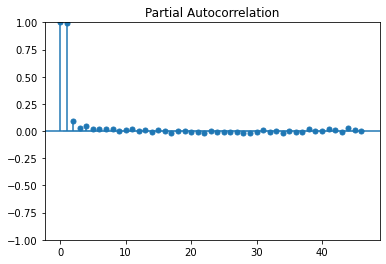

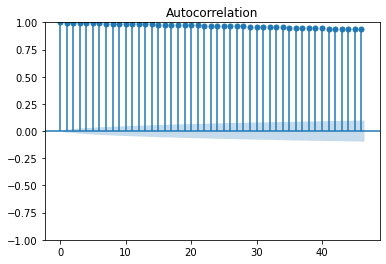

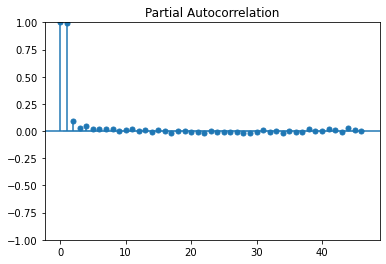

In [18]:
smp.plot_acf(spread)
smp.plot_pacf(spread)

The spread fit an AR(1) model

# Plots

In [19]:
price_df_norm = working_df.dropna().copy()
for c in price_df_norm.columns : 
    price_df_norm[c] = price_df_norm[c] / price_df_norm[c].iloc[0]

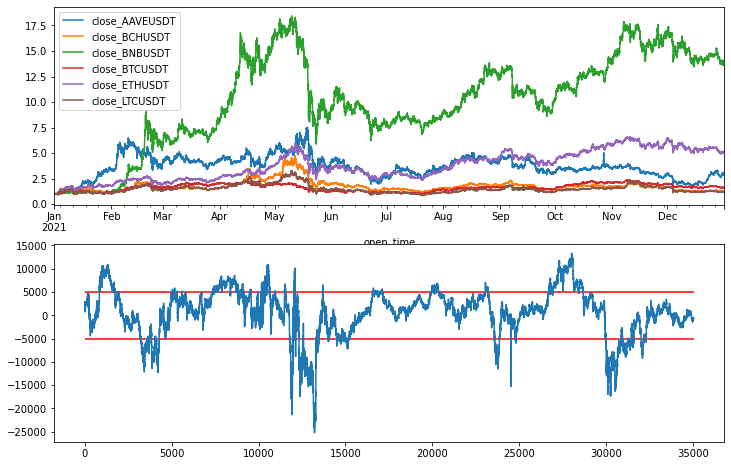

In [20]:
fig,ax = plt.subplots(2,1,figsize = (12,8))
price_df_norm.plot(ax = ax[0])


ax[1].plot(spread.values)
ax[1].hlines(np.std(spread),xmin = 0,xmax = len(spread),color = 'r')
ax[1].hlines(-np.std(spread),xmin = 0,xmax = len(spread),color = 'r')

In [21]:
working_df.corr()

,close_AAVEUSDT,close_BCHUSDT,close_BNBUSDT,close_BTCUSDT,close_ETHUSDT,close_LTCUSDT
close_AAVEUSDT,1.000000,0.642907,0.207167,0.355623,0.058852,0.615471
close_BCHUSDT,0.642907,1.000000,0.511248,0.384323,0.296535,0.888918
close_BNBUSDT,0.207167,0.511248,1.000000,0.631436,0.872888,0.552001
close_BTCUSDT,0.355623,0.384323,0.631436,1.000000,0.560918,0.670767
close_ETHUSDT,0.058852,0.296535,0.872888,0.560918,1.000000,0.335243
close_LTCUSDT,0.615471,0.888918,0.552001,0.670767,0.335243,1.000000


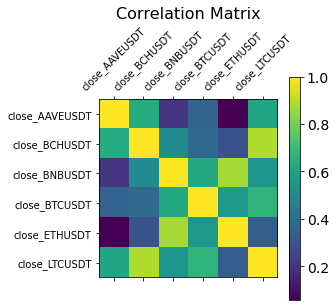

In [22]:
plt.matshow(working_df.corr())

plt.xticks(range(working_df.select_dtypes(['number']).shape[1]), working_df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(working_df.select_dtypes(['number']).shape[1]), working_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Comparing the different years
(only the regression and spread)

In [23]:
working_df = all_crypto_15.set_index('open_time')[list_column].dropna()
working_df.index = pd.to_datetime(working_df.index)

In [24]:
all_years = working_df.index.year.unique().to_list()

In [25]:
for year in all_years : 
    year_df = working_df.loc[str(year)]

    endog = year_df['close_BTCUSDT']
    exog  = year_df.drop('close_BTCUSDT',axis = 1)

    model = sm.OLS(endog= endog,exog = exog)
    model_calibrated = model.fit()

    model_calibrated.save(f'../models/OLS/ols_{year}.pk')

    

    

In [26]:
params_df = pd.DataFrame()
for year in all_years :
    model_loaded = model_calibrated.load(f'../models/OLS/ols_{year}.pk')
    params_df = pd.concat([params_df,pd.DataFrame([model_loaded.params],index = [year])])

In [27]:
params_df

,close_ETHUSDT,close_BNBUSDT,close_LTCUSDT,close_XMRUSDT,close_BCHUSDT
2019,-125.692464,149.128735,213.174687,174.192392,22.655598
2020,10.049202,-77.704213,123.449875,56.475370,-7.934835
2021,6.790233,-34.817748,336.360202,139.595886,-91.802775
2022,4.012349,25.511388,-67.921371,24.550112,66.524891
2023,22.275958,-2.748696,-13.848058,-36.116028,-36.923825


No real stability on YoY coeficient

In [28]:
list_of_year_spread = pd.DataFrame()

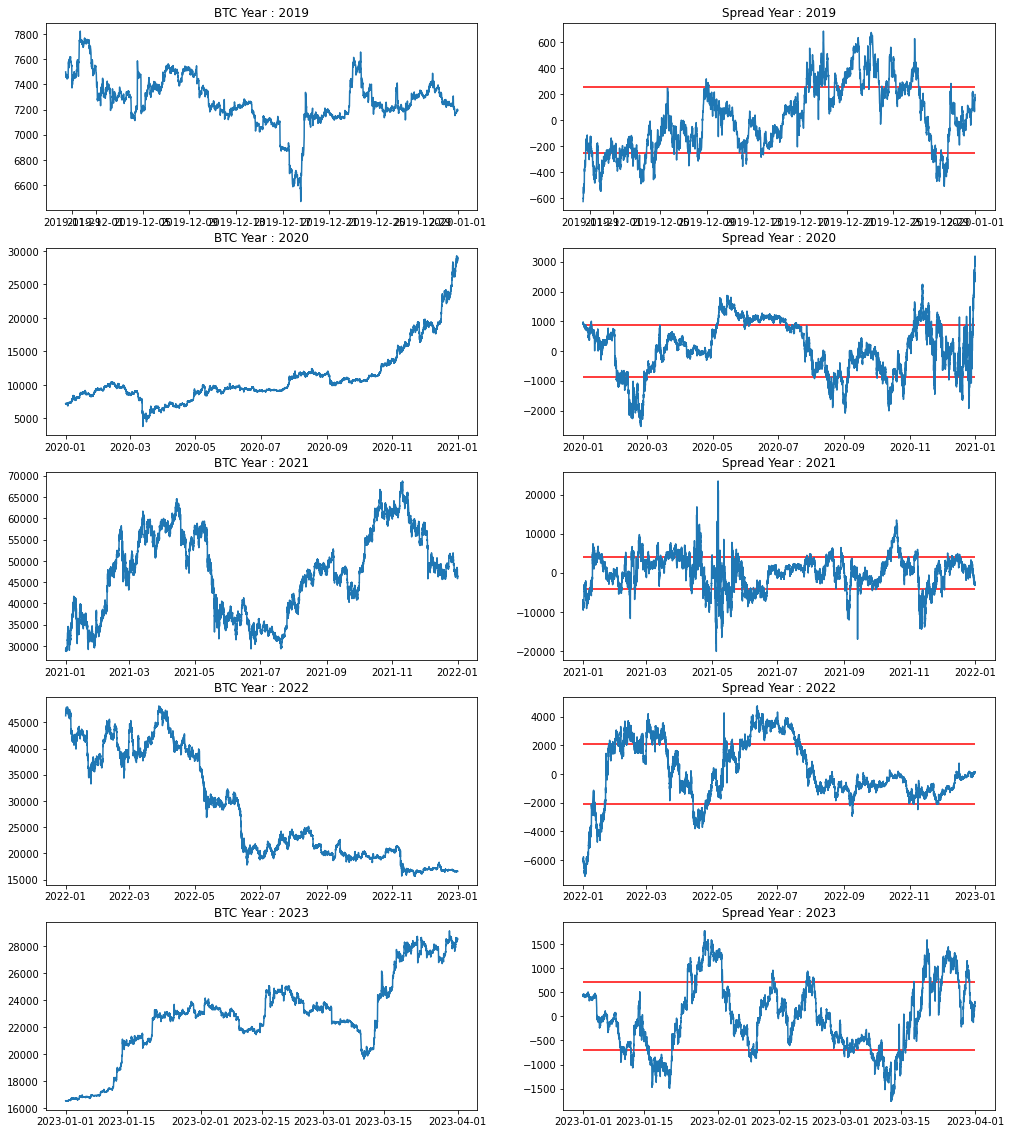

In [29]:
fig,ax = plt.subplots(len(all_years),2,figsize= (17,20))
for i  in range(len(all_years)) :
    year = all_years[i]
    model_loaded = model_calibrated.load(f'../models/OLS/ols_{year}.pk')
    spread = working_df.loc[str(year)]['close_BTCUSDT'] - model_loaded.predict()

    year_spread = pd.DataFrame(spread)
    year_spread['xmin'] = - np.std(spread)
    year_spread['xmax'] = np.std(spread)
    

    list_of_year_spread = pd.concat([list_of_year_spread,year_spread])

    xmin = working_df.loc[str(year)]['close_BTCUSDT'].index[0]
    xmax = working_df.loc[str(year)]['close_BTCUSDT'].index[-1]

    ax[i][1].plot(spread, label = year)
    ax[i][1].hlines(np.std(spread),xmin = xmin,xmax = xmax,color = 'r')
    ax[i][1].hlines(-np.std(spread),xmin = xmin,xmax = xmax,color = 'r')
    ax[i][1].set_title(f'Spread Year : {year}')

    ax[i][0].plot(working_df.loc[str(year)]['close_BTCUSDT'])
    ax[i][0].set_title(f'BTC Year : {year}')
    

<AxesSubplot:xlabel='open_time'>

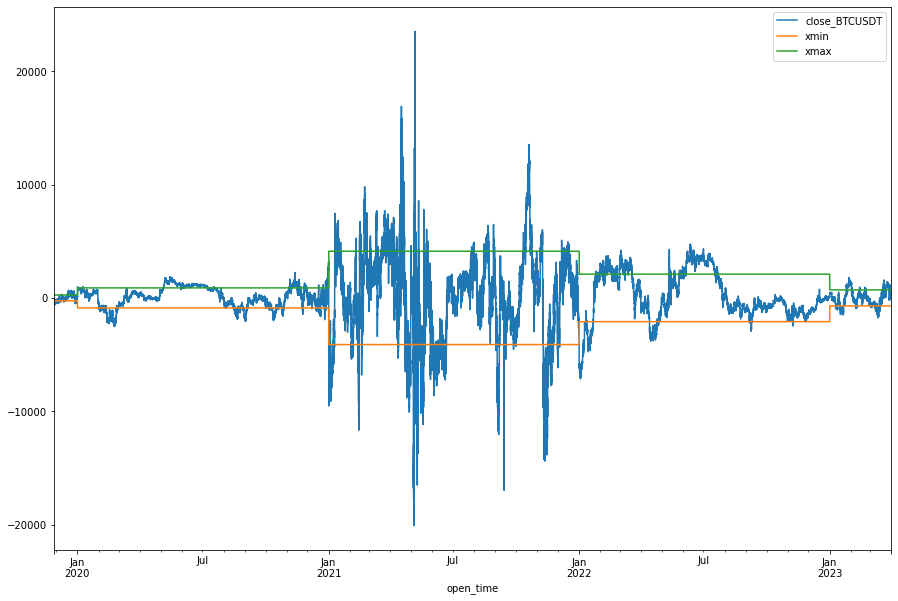

In [30]:
list_of_year_spread.plot(figsize = (15,10))



In [31]:
list_of_year_spread = list_of_year_spread.rename({"close_BTCUSDT":"Close"},axis = 1)
list_of_year_spread["Open"] = list_of_year_spread["Close"] * 1.1 
list_of_year_spread["High"] = list_of_year_spread["Close"] * 1.3
list_of_year_spread["Low"] = list_of_year_spread["Close"]  * 0.9

In [32]:
list_of_year_spread = list_of_year_spread + 100000

In [33]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

In [34]:
def identity(x):
    return x

In [35]:
class StdevCross(Strategy):

    def init(self):
        self.close = self.data.Close
        
        self.xmin = self.I(identity,self.data.df["xmin"])
        self.xmax = self.I(identity,self.data.df["xmax"])
        
        print(self.xmin, self.xmax)

    def next(self):
        if crossover(self.xmin,self.close ):
            self.position.close()
            self.buy()
        elif crossover(self.xmax,self.close):
            self.position.close()
            self.sell()
        elif crossover(self.xmin,self.close ):
             self.buy()
        elif self.close >= self.close[-10]:  
             self.buy()

In [36]:
list_of_year_spread['Volume'] = 10

In [37]:
bt = Backtest(list_of_year_spread,StdevCross,cash = 100000000000,commission = .001,exclusive_orders=True)

In [38]:
output = bt.run()
output

[99742.84701321 99742.84701321 99742.84701321 ... 99294.06508886
 99294.06508886 99294.06508886] [100257.15298679 100257.15298679 100257.15298679 ... 100705.93491114
 100705.93491114 100705.93491114]


Start                     2019-11-28 10:00:00
End                       2023-04-01 00:00:00
Duration                   1219 days 14:00:00
Exposure Time [%]                   13.131934
Equity Final [$]                 87568.949161
Equity Peak [$]                100000000000.0
Return [%]                         -99.999912
Buy & Hold Return [%]                0.913126
Return (Ann.) [%]                  -98.430992
Volatility (Ann.) [%]                0.990618
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -99.99992
Avg. Drawdown [%]                   -99.99992
Max. Drawdown Duration     1219 days 13:45:00
Avg. Drawdown Duration     1219 days 13:45:00
# Trades                                15232
Win Rate [%]                         3.433561
Best Trade [%]                        7.19273
Worst Trade [%]                     -3.936787
Avg. Trade [%]                    

In [39]:
bt.plot(resample = '4H')

ValueError: Length of values (10) does not match length of index (5)

In [ ]:
# DEBUG STRAT SMA

def SMA(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()

class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    
    def init(self):
        # Precompute the two moving averages
        # self.xmin = self.I(SMA, self.data.Close, self.n1)
        self.xmin = self.I(lambda x: x,self.data['xmin'])
        self.xmax = self.I(lambda x: x,self.data['xmax'])
        self.close = self.I(lambda x : x,self.data.Close,plot = False)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.close, self.xmax):
            self.position.close()
            self.sell()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.xmin, self.close):
            self.position.close()
            self.buy()

In [ ]:

bt = Backtest(list_of_year_spread, SmaCross, cash=100_000, commission=.002)
stats = bt.run()
stats

C:\Users\Titouan\AppData\Local\Temp/ipykernel_16052/492305996.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(list_of_year_spread, SmaCross, cash=100_000, commission=.002)


Start                     2019-11-28 10:00:00
End                       2023-04-01 00:00:00
Duration                   1219 days 14:00:00
Exposure Time [%]                   65.915777
Equity Final [$]                262207.627353
Equity Peak [$]                 314549.886836
Return [%]                         162.207627
Buy & Hold Return [%]                0.917524
Return (Ann.) [%]                   33.462554
Volatility (Ann.) [%]                37.69125
Sharpe Ratio                         0.887807
Sortino Ratio                        2.402541
Calmar Ratio                         1.948033
Max. Drawdown [%]                  -17.177609
Avg. Drawdown [%]                   -1.835916
Max. Drawdown Duration      430 days 13:30:00
Avg. Drawdown Duration        5 days 12:10:00
# Trades                                  736
Win Rate [%]                        28.532609
Best Trade [%]                      16.799639
Worst Trade [%]                    -15.306621
Avg. Trade [%]                    

In [ ]:
bt._results

Start                     2019-11-28 10:00:00
End                       2023-04-01 00:00:00
Duration                   1219 days 14:00:00
Exposure Time [%]                   65.915777
Equity Final [$]                262207.627353
Equity Peak [$]                 314549.886836
Return [%]                         162.207627
Buy & Hold Return [%]                0.917524
Return (Ann.) [%]                   33.462554
Volatility (Ann.) [%]                37.69125
Sharpe Ratio                         0.887807
Sortino Ratio                        2.402541
Calmar Ratio                         1.948033
Max. Drawdown [%]                  -17.177609
Avg. Drawdown [%]                   -1.835916
Max. Drawdown Duration      430 days 13:30:00
Avg. Drawdown Duration        5 days 12:10:00
# Trades                                  736
Win Rate [%]                        28.532609
Best Trade [%]                      16.799639
Worst Trade [%]                    -15.306621
Avg. Trade [%]                    

In [ ]:
bt._data

,Close,xmin,xmax,Open,High,Low,Volume
open_time,,,,,,,
2019-11-28 10:00:00,99372.205865,99742.847013,100257.152987,99309.426451,99183.867624,99434.985278,10
2019-11-28 10:15:00,99398.994804,99742.847013,100257.152987,99338.894284,99218.693245,99459.095324,10
2019-11-28 10:30:00,99394.771021,99742.847013,100257.152987,99334.248123,99213.202328,99455.293919,10
2019-11-28 10:45:00,99484.078631,99742.847013,100257.152987,99432.486494,99329.302220,99535.670768,10
2019-11-28 11:00:00,99433.958906,99742.847013,100257.152987,99377.354797,99264.146578,99490.563016,10
...,...,...,...,...,...,...,...
2023-03-31 23:00:00,100311.569607,99294.293852,100705.706148,100342.726568,100405.040489,100280.412647,10
2023-03-31 23:15:00,100292.143663,99294.293852,100705.706148,100321.358029,100379.786761,100262.929296,10
2023-03-31 23:30:00,100295.005302,99294.293852,100705.706148,100324.505832,100383.506892,100265.504771,10


In [ ]:
bt.plot(resample = "1D",plot_volume = False,plot_equity=False,plot_drawdown=False)

ValueError: Length of values (2) does not match length of index (1)

<AxesSubplot:xlabel='open_time'>

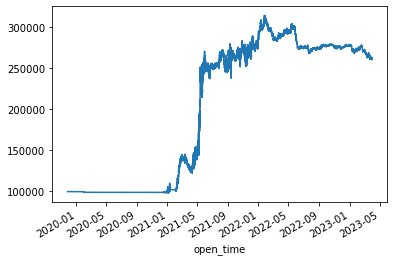

In [ ]:
stats["_equity_curve"]["Equity"].plot()

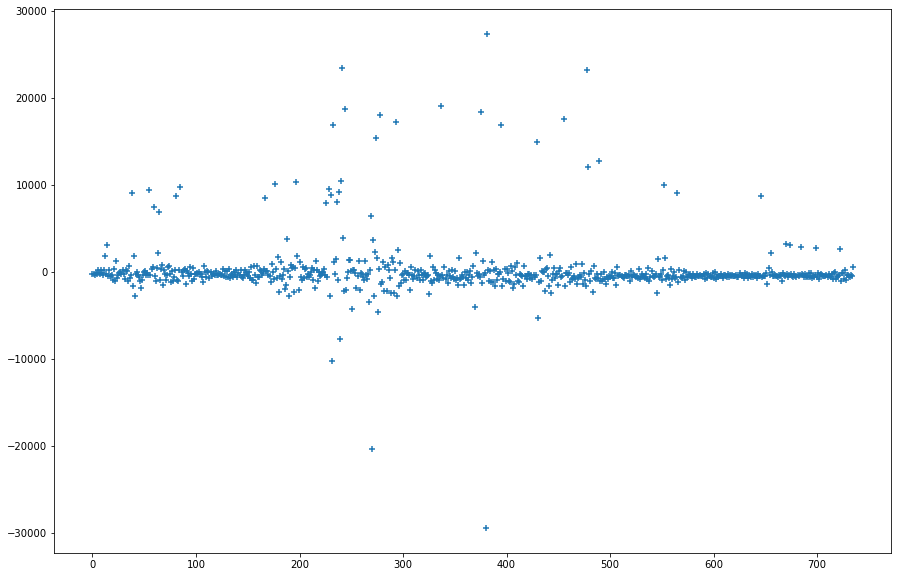

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(stats._trades.index,stats._trades.PnL,marker = '+')

In [ ]:
pd.DataFrame(stats)

,0
Start,2019-11-28 10:00:00
End,2023-04-01 00:00:00
Duration,1219 days 14:00:00
Exposure Time [%],65.915777
Equity Final [$],262207.627353
Equity Peak [$],314549.886836
Return [%],162.207627
Buy & Hold Return [%],0.917524
Return (Ann.) [%],33.462554
Volatility (Ann.) [%],37.69125
